In [66]:
pip install bertopic

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install numba==0.56.0

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 3.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 2.6 MB/s eta 0:00:0000:0100:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 3.9 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.1
    Uninstalling numpy-1.26.1:
      Successfully uninstalled numpy-1.26.1
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.43.0
    Uninstalling llvmlite-0.43.0:
      Successfully uninstalled llvmlite-0.43.0
  Attempting uninstall: numba
    Found existing installation: numba 0.60.0
    Uninstalling numba-0.60.0:
      Successfully uninstalled numba-0.60.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-macos 2.14.0 requires numpy>=1.23.5, but you have numpy 1.22.4 which is incompatible.


In [64]:
pip install plotly==5.22.0

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


In [79]:
import json

def combine_json_files(file_paths, output_json_file, output_txt_file):
    # Initialize an empty list to store prompt values
    prompts = []

    # Read each JSON file and extract the 'prompt' attribute from each object in the array
    for file_path in file_paths:
        try:
            with open(file_path, 'r', encoding='utf-8') as f:
                data = json.load(f)
                if isinstance(data, list):
                    for item in data:
                        if 'prompt' in item:
                            prompts.append(item['prompt'])
                        else:
                            print(f'Warning: No "prompt" key found in an item in file: {file_path}')
                else:
                    print(f'Warning: File {file_path} does not contain a JSON array')

        except Exception as e:
            print(f'Error reading file {file_path}: {e}')

    # Write all prompts to a JSON file
    combined_json = {
        'prompts': prompts
    }
    with open(output_json_file, 'w', encoding='utf-8') as json_file:
        json.dump(combined_json, json_file, indent=4)

    # Write all prompts to a text file
    with open(output_txt_file, 'w', encoding='utf-8') as txt_file:
        txt_file.write("\n".join(prompts))

                 

file_paths = ['Desktop/internship/study/output/2/story/story 2.json',
              '/Users/mimi/Desktop/internship/study/output/7/story/story 7.json',
              '/Users/mimi/Desktop/internship/study/output/16/story/story 16.json'] 
output_json_file = '/Users/mimi/Desktop/internship/study/output/combined_prompts_story.json'
output_txt_file = '/Users/mimi/Desktop/internship/study/output/combined_prompts_story.txt'
combine_json_files(file_paths, output_json_file, output_txt_file)


In [85]:
from bertopic import BERTopic

def read_txt_file(txt_file):
    prompts = []
    with open(txt_file, 'r', encoding='utf-8') as f:
        for line in f:
            prompt = line.strip()  # Remove newline characters
            prompts.append(prompt)
    return prompts
# can be found in our shared folder, change path
docs_sound = read_txt_file('Desktop/internship/study/output/combined_prompts_sound.txt')
docs_story = read_txt_file('Desktop/internship/study/output/combined_prompts_story.txt')
topic_model = BERTopic()
topics, probs = topic_model.fit_transform(docs_sound)
topic_model.get_topic_info()


,Topic,Count,Name,Representation,Representative_Docs
0,0,22,0_the_and_is_stones,"[the, and, is, stones, sand, are, insects, und...","[insects and bugs are buzzing, walking under t..."
1,1,17,1_on_style_night_at,"[on, style, night, at, nature, around, train, ...",[one man with cowboy boots walking on rubble n...
2,2,11,2_beach_horizon_seagull_steps,"[beach, horizon, seagull, steps, footsteps, cr...",[horizon seagull footsteps beach parasol ship ...


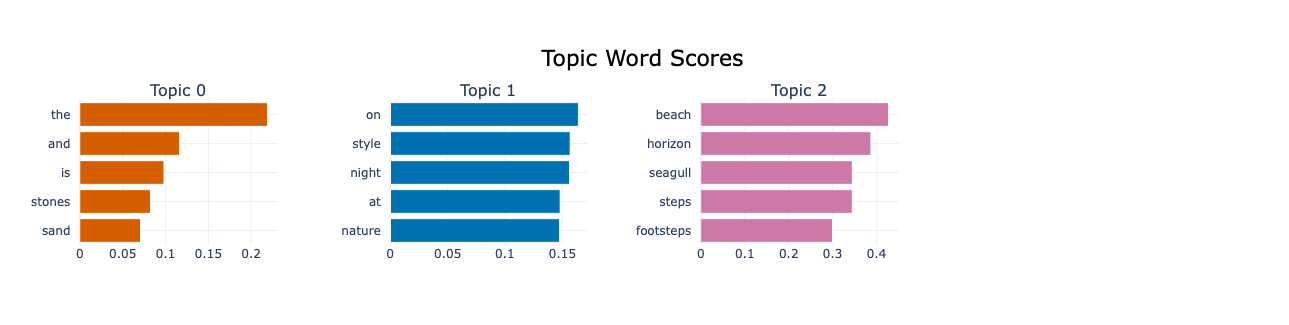

In [86]:
topic_model.visualize_barchart()

In [76]:
#does not work. looks like data set is too small (https://github.com/MaartenGr/BERTopic/issues/378)
#fig = topic_model.visualize_topics()
#fig.show()

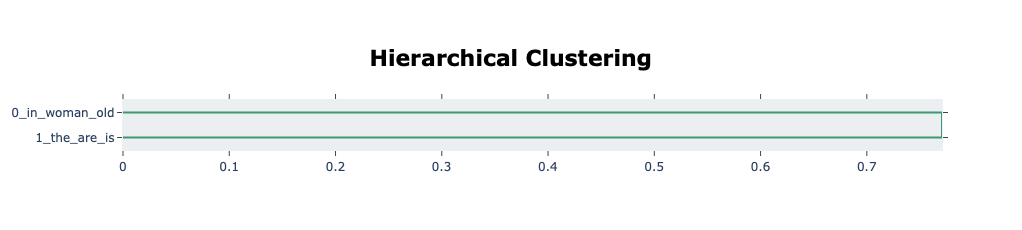

In [82]:
topic_model.visualize_hierarchy()

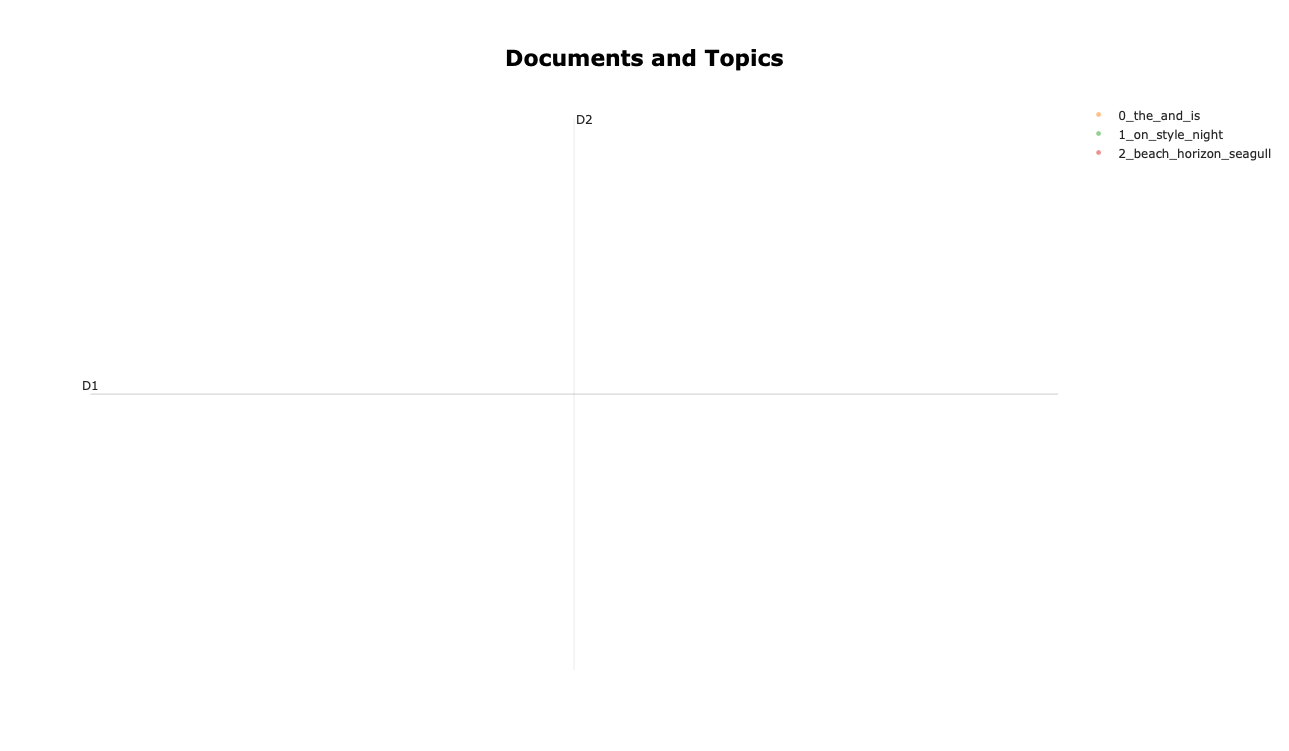

In [87]:
topic_model.visualize_documents(docs_sound)

In [50]:
topic_model.get_topic(0)

[('the', 0.2278173868408722),
 ('and', 0.12081445536281613),
 ('is', 0.10175020997846268),
 ('ground', 0.07364668701963187),
 ('are', 0.07364668701963187),
 ('under', 0.07364668701963187),
 ('trees', 0.07364668701963187),
 ('buzzing', 0.07364668701963187),
 ('insects', 0.07364668701963187),
 ('tall', 0.07364668701963187)]

In [51]:
topic_model.get_topic(1)

[('on', 0.1637347494753404),
 ('style', 0.156584389353827),
 ('night', 0.15610190653426922),
 ('at', 0.14785660910706802),
 ('nature', 0.14744096169099),
 ('around', 0.13884946093266443),
 ('train', 0.1295358589427089),
 ('walking', 0.12749745381010222),
 ('boots', 0.11988326084895615),
 ('tracks', 0.11988326084895615)]

In [52]:
topic_model.get_topic(2)

[('beach', 0.30758514045877566),
 ('horizon', 0.27829677894119514),
 ('steps', 0.2476280631027055),
 ('seagull', 0.2476280631027055),
 ('footsteps', 0.21533820750866672),
 ('stones', 0.19516650361430227),
 ('ship', 0.1810883457807352),
 ('meadow', 0.1810883457807352),
 ('ice', 0.1810883457807352),
 ('parasol', 0.1810883457807352)]

In [35]:
 topic_model.get_document_info(docs)

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,"insects are buzzing, walking under the trees. ...",0,0_the_and_is_stones,"[the, and, is, stones, sand, are, insects, und...","[insects and bugs are buzzing, walking under t...",the - and - is - stones - sand - are - insects...,1.000000,False
1,"insects are buzzing, walking under the trees. ...",0,0_the_and_is_stones,"[the, and, is, stones, sand, are, insects, und...","[insects and bugs are buzzing, walking under t...",the - and - is - stones - sand - are - insects...,1.000000,False
2,"insects are buzzing, walking under the trees. ...",0,0_the_and_is_stones,"[the, and, is, stones, sand, are, insects, und...","[insects and bugs are buzzing, walking under t...",the - and - is - stones - sand - are - insects...,1.000000,False
3,"insects are buzzing, walking under the trees. ...",0,0_the_and_is_stones,"[the, and, is, stones, sand, are, insects, und...","[insects and bugs are buzzing, walking under t...",the - and - is - stones - sand - are - insects...,1.000000,False
4,"insects are buzzing, walking under the trees. ...",0,0_the_and_is_stones,"[the, and, is, stones, sand, are, insects, und...","[insects and bugs are buzzing, walking under t...",the - and - is - stones - sand - are - insects...,1.000000,False
5,"insects are buzzing, walking under the trees. ...",0,0_the_and_is_stones,"[the, and, is, stones, sand, are, insects, und...","[insects and bugs are buzzing, walking under t...",the - and - is - stones - sand - are - insects...,1.000000,False
6,"insects are buzzing, walking under the trees. ...",0,0_the_and_is_stones,"[the, and, is, stones, sand, are, insects, und...","[insects and bugs are buzzing, walking under t...",the - and - is - stones - sand - are - insects...,1.000000,False
7,"insects and bugs are buzzing, walking under th...",0,0_the_and_is_stones,"[the, and, is, stones, sand, are, insects, und...","[insects and bugs are buzzing, walking under t...",the - and - is - stones - sand - are - insects...,1.000000,False
8,"insects and bugs are buzzing, walking under th...",0,0_the_and_is_stones,"[the, and, is, stones, sand, are, insects, und...","[insects and bugs are buzzing, walking under t...",the - and - is - stones - sand - are - insects...,1.000000,False
9,"insects and bugs are buzzing, walking under th...",0,0_the_and_is_stones,"[the, and, is, stones, sand, are, insects, und...","[insects and bugs are buzzing, walking under t...",the - and - is - stones - sand - are - insects...,1.000000,True
